In [1]:
paciente='paciente2'

In [2]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

13931

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

13931

In [9]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

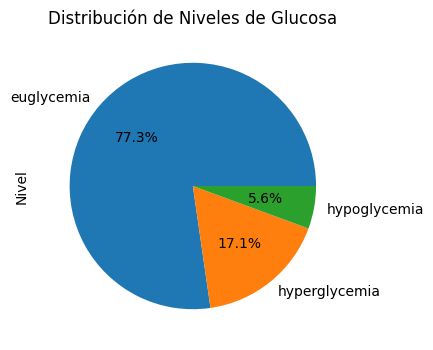

In [10]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [11]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       10767
hyperglycemia     2383
hypoglycemia       781
Name: Nivel, dtype: int64

In [12]:
df_Y_scaled

,Glucose level,Nivel
0,196.0,hyperglycemia
1,189.0,hyperglycemia
2,183.0,hyperglycemia
3,177.0,euglycemia
4,181.0,hyperglycemia
...,...,...
13926,95.0,euglycemia
13927,105.0,euglycemia
13928,109.0,euglycemia
13929,104.0,euglycemia


## Paso 1

In [13]:
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [14]:
print(len(XP[2]))

2786


In [15]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [16]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [17]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1971
Program finished in 2.760947499977192 seconds - using multiprocessing
1 3944
Program finished in 2.954954299988458 seconds - using multiprocessing
2 5605
Program finished in 3.9943216999818105 seconds - using multiprocessing
3 7567
Program finished in 3.171887800010154 seconds - using multiprocessing
4 9518
Program finished in 3.1232476999866776 seconds - using multiprocessing


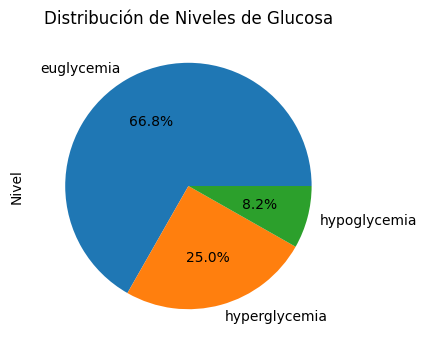

In [18]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [19]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       6354
hyperglycemia    2383
hypoglycemia      781
Name: Nivel, dtype: int64

<AxesSubplot: >

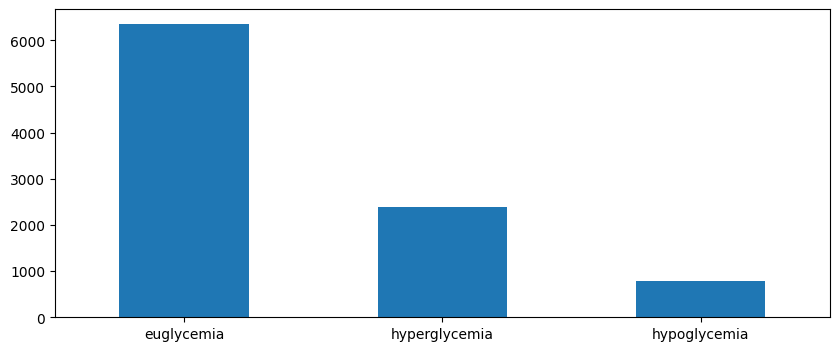

In [20]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [21]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [22]:
len(XNew)

9518

In [23]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [24]:
len(YNew)

9518

## Paso 2

In [25]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

1904


In [26]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1431
Program finished in 1.088334699976258 seconds - using multiprocessing
1 2872
Program finished in 1.1045194999896921 seconds - using multiprocessing
2 4005
Program finished in 1.5895864000194706 seconds - using multiprocessing
3 5455
Program finished in 0.9653137999994215 seconds - using multiprocessing
4 6907
Program finished in 1.0363054999907035 seconds - using multiprocessing


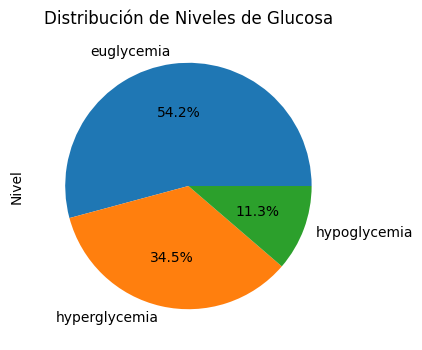

In [27]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [28]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       3743
hyperglycemia    2383
hypoglycemia      781
Name: Nivel, dtype: int64

## Paso 3

In [29]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

1381


In [30]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 1098
Program finished in 0.39021059998776764 seconds - using multiprocessing
1 2243
Program finished in 0.31050339998910204 seconds - using multiprocessing
2 3074
Program finished in 0.6672765999974217 seconds - using multiprocessing
3 4207
Program finished in 0.3307397000025958 seconds - using multiprocessing
4 5338
Program finished in 0.38278089999221265 seconds - using multiprocessing


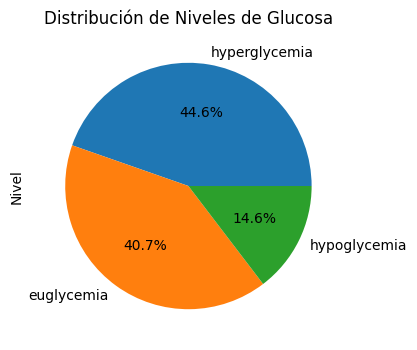

In [31]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [32]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2383
euglycemia       2174
hypoglycemia      781
Name: Nivel, dtype: int64

In [33]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [34]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [35]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1068
0 897
Program finished in 0.1696286000078544 seconds - using multiprocessing
1 1828
Program finished in 0.11730420001549646 seconds - using multiprocessing
2 2547
Program finished in 0.1888905999949202 seconds - using multiprocessing
3 3498
Program finished in 0.10061520000454038 seconds - using multiprocessing
4 4410
Program finished in 0.14620060002198443 seconds - using multiprocessing


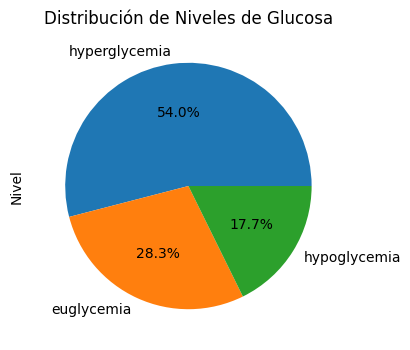

In [36]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [37]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2383
euglycemia       1246
hypoglycemia      781
Name: Nivel, dtype: int64

In [38]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

882
0 646
Program finished in 0.07249330001650378 seconds - using multiprocessing
1 1413
Program finished in 0.04679839999880642 seconds - using multiprocessing
2 2197
Program finished in 0.04498769997735508 seconds - using multiprocessing
3 2795
Program finished in 0.08288370000082068 seconds - using multiprocessing
4 3435
Program finished in 0.07905729999765754 seconds - using multiprocessing


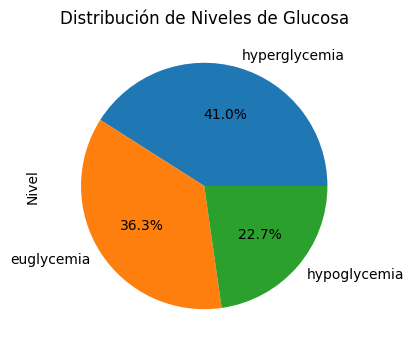

In [39]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [40]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1408
euglycemia       1246
hypoglycemia      781
Name: Nivel, dtype: int64

In [41]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [42]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [43]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

687
0 622
Program finished in 0.038672099995892495 seconds - using multiprocessing
1 1266
Program finished in 0.02571630000602454 seconds - using multiprocessing
2 1798
Program finished in 0.04885620001005009 seconds - using multiprocessing
3 2434
Program finished in 0.03492030000779778 seconds - using multiprocessing
4 3064
Program finished in 0.032545699999900535 seconds - using multiprocessing


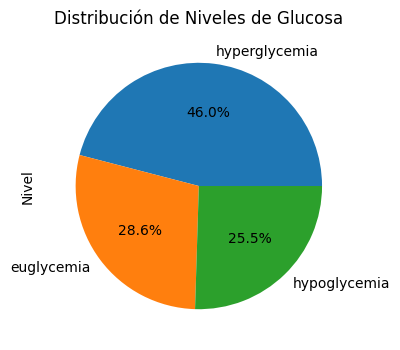

In [44]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [45]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1408
euglycemia        875
hypoglycemia      781
Name: Nivel, dtype: int64

In [46]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

613
0 507
Program finished in 0.0356055999873206 seconds - using multiprocessing
1 1078
Program finished in 0.07310199999483302 seconds - using multiprocessing
2 1649
Program finished in 0.02404369998839684 seconds - using multiprocessing
3 2137
Program finished in 0.03678699998999946 seconds - using multiprocessing
4 2643
Program finished in 0.03262790001463145 seconds - using multiprocessing


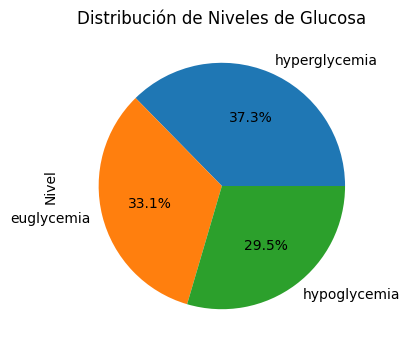

In [47]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [48]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    987
euglycemia       875
hypoglycemia     781
Name: Nivel, dtype: int64

In [49]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [50]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [51]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [52]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [53]:
len(array_Ytrain)

2643

In [54]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

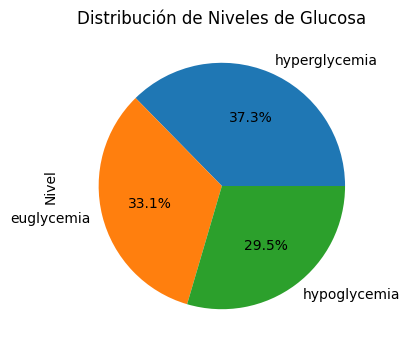

In [55]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [56]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    987
euglycemia       875
hypoglycemia     781
Name: Nivel, dtype: int64

In [57]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [58]:
minClass

781

In [59]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

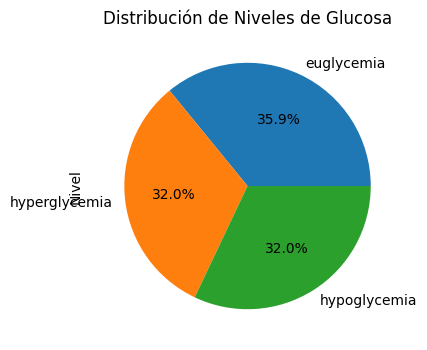

In [60]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [61]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       875
hyperglycemia    781
hypoglycemia     781
Name: Nivel, dtype: int64

In [62]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

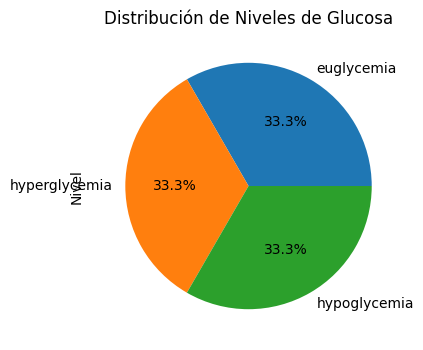

In [63]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [64]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       781
hyperglycemia    781
hypoglycemia     781
Name: Nivel, dtype: int64

<AxesSubplot: >

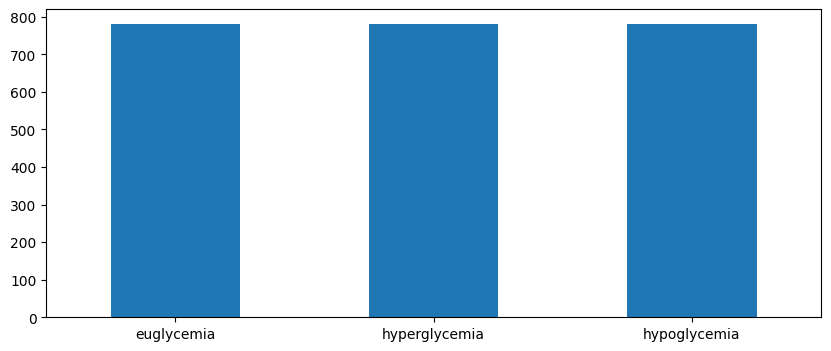

In [65]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [66]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [67]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [68]:
with open('dataset/generado/'+paciente+'/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [69]:
len(array_Xval)

1741

In [70]:
with open('dataset/generado/'+paciente+'/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [71]:
len(array_Yval)

1741

In [72]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

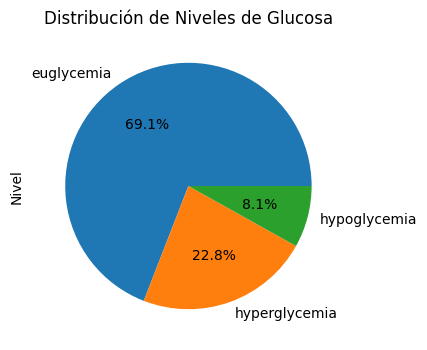

In [73]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [74]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       1203
hyperglycemia     397
hypoglycemia      141
Name: Nivel, dtype: int64

<AxesSubplot: >

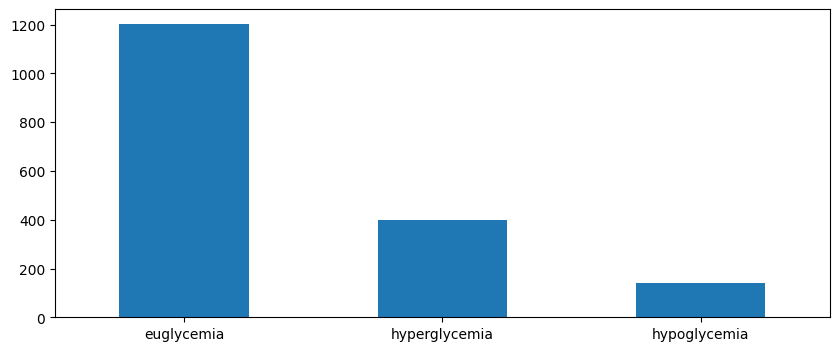

In [75]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [76]:
N=5
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

348


In [77]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xval.shape[1],array_Xval.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 266
Program finished in 0.030207999981939793 seconds - using multiprocessing
1 523
Program finished in 0.03151669999351725 seconds - using multiprocessing
2 763
Program finished in 0.036754700005985796 seconds - using multiprocessing
3 1014
Program finished in 0.03189640000346117 seconds - using multiprocessing
4 1246
Program finished in 0.03501910000341013 seconds - using multiprocessing


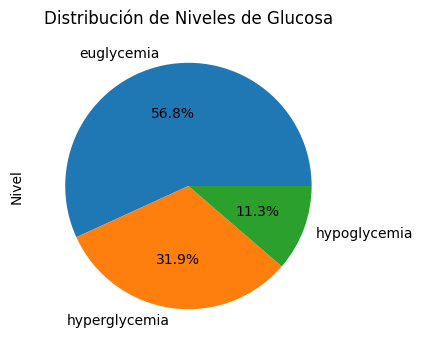

In [78]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [79]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       708
hyperglycemia    397
hypoglycemia     141
Name: Nivel, dtype: int64

In [80]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 214
Program finished in 0.02458260001731105 seconds - using multiprocessing
1 407
Program finished in 0.026524299988523126 seconds - using multiprocessing
2 579
Program finished in 0.027795700007118285 seconds - using multiprocessing
3 768
Program finished in 0.025626499991631135 seconds - using multiprocessing
4 955
Program finished in 0.02146260000881739 seconds - using multiprocessing


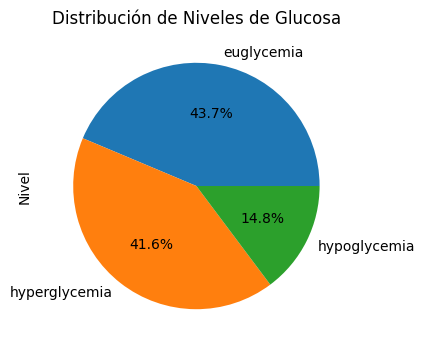

In [81]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [82]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       417
hyperglycemia    397
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

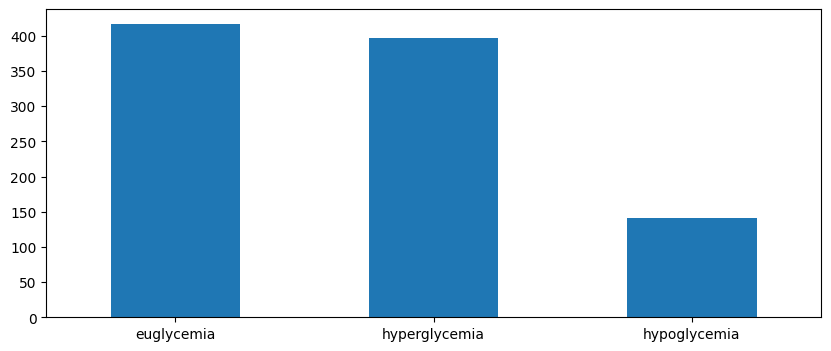

In [83]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [84]:
with open('dataset/generado/'+paciente+'/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [85]:
with open('dataset/generado/'+paciente+'/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [86]:
len(XNew)

955

In [87]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 168
Program finished in 0.013706800004001707 seconds - using multiprocessing
1 327
Program finished in 0.01311379999970086 seconds - using multiprocessing
2 477
Program finished in 0.014434899989282712 seconds - using multiprocessing
3 630
Program finished in 0.018913700012490153 seconds - using multiprocessing
4 782
Program finished in 0.019159300019964576 seconds - using multiprocessing


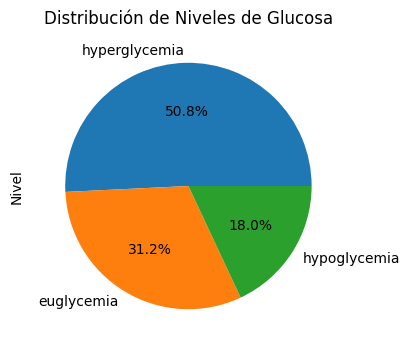

In [88]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [89]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    397
euglycemia       244
hypoglycemia     141
Name: Nivel, dtype: int64

In [90]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 122
Program finished in 0.013160400005290285 seconds - using multiprocessing
1 252
Program finished in 0.013300899998284876 seconds - using multiprocessing
2 373
Program finished in 0.01815540000097826 seconds - using multiprocessing
3 491
Program finished in 0.024054799985606223 seconds - using multiprocessing
4 622
Program finished in 0.018240499979583547 seconds - using multiprocessing


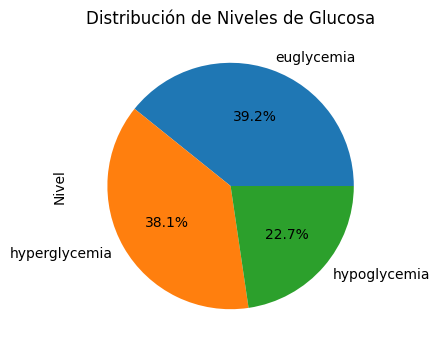

In [91]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [92]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       244
hyperglycemia    237
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

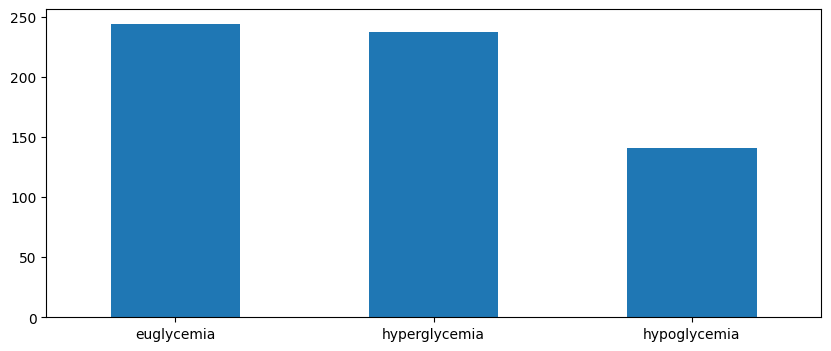

In [93]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [94]:
with open('dataset/generado/'+paciente+'/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [95]:
with open('dataset/generado/'+paciente+'/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [96]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.40,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 113
Program finished in 0.016366600000765175 seconds - using multiprocessing
1 220
Program finished in 0.01726369999232702 seconds - using multiprocessing
2 322
Program finished in 0.01569329999620095 seconds - using multiprocessing
3 427
Program finished in 0.014234900008887053 seconds - using multiprocessing
4 527
Program finished in 0.014717799989739433 seconds - using multiprocessing


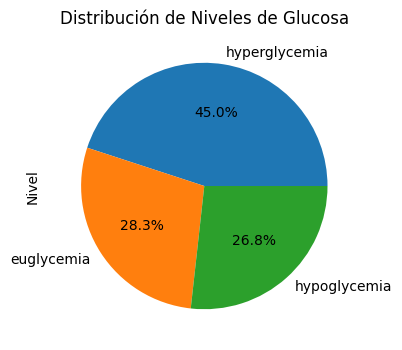

In [97]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [98]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    237
euglycemia       149
hypoglycemia     141
Name: Nivel, dtype: int64

In [99]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.40,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 88
Program finished in 0.01449150001280941 seconds - using multiprocessing
1 180
Program finished in 0.012914000020828098 seconds - using multiprocessing
2 259
Program finished in 0.015813500009244308 seconds - using multiprocessing
3 344
Program finished in 0.017185700009576976 seconds - using multiprocessing
4 436
Program finished in 0.015436000016052276 seconds - using multiprocessing


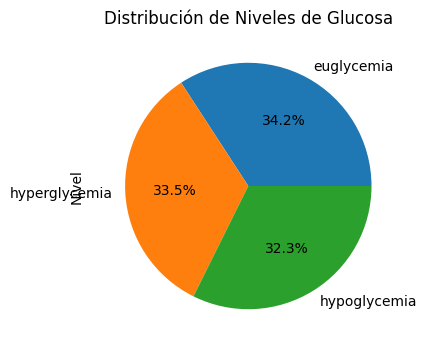

In [100]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [101]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       149
hyperglycemia    146
hypoglycemia     141
Name: Nivel, dtype: int64

<AxesSubplot: >

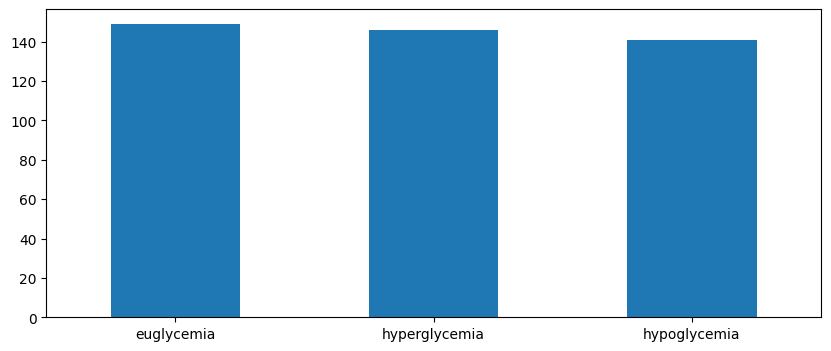

In [102]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [103]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [104]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [105]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'rb') as f:
    array_Xval = np.load(f)

In [106]:
len(array_Xval)

436

In [107]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'rb') as f:
    array_Yval = np.load(f)

In [108]:
len(array_Yval)

436

In [109]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

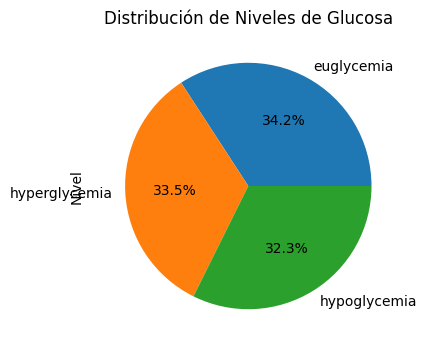

In [110]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [111]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       149
hyperglycemia    146
hypoglycemia     141
Name: Nivel, dtype: int64

In [112]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

141

In [113]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [114]:
len(YnewLabel)

431

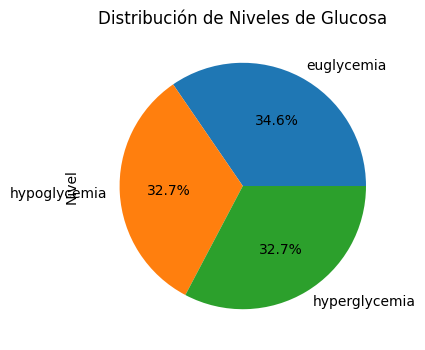

In [115]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       149
hypoglycemia     141
hyperglycemia    141
Name: Nivel, dtype: int64

In [117]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

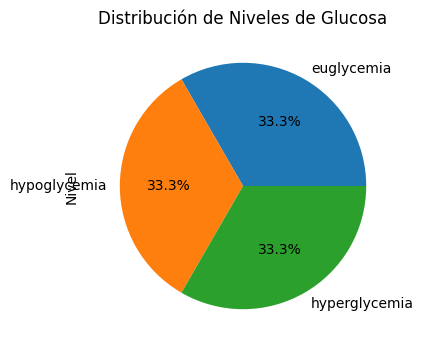

In [118]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [119]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       141
hypoglycemia     141
hyperglycemia    141
Name: Nivel, dtype: int64

<AxesSubplot: >

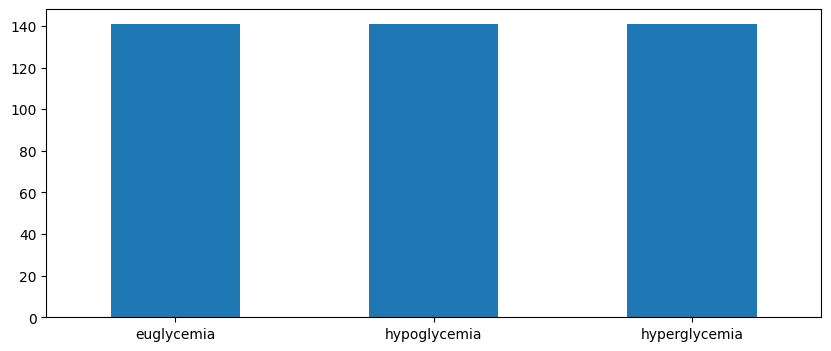

In [120]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [121]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [122]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)